In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Import data and clear data

In [2]:
df = pd.read_csv('../train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Exploratory Data Analysis (EDA) 

In [105]:
# cols = ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']
cols = ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

/Users/changyaohua/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/changyaohua/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/changyaohua/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


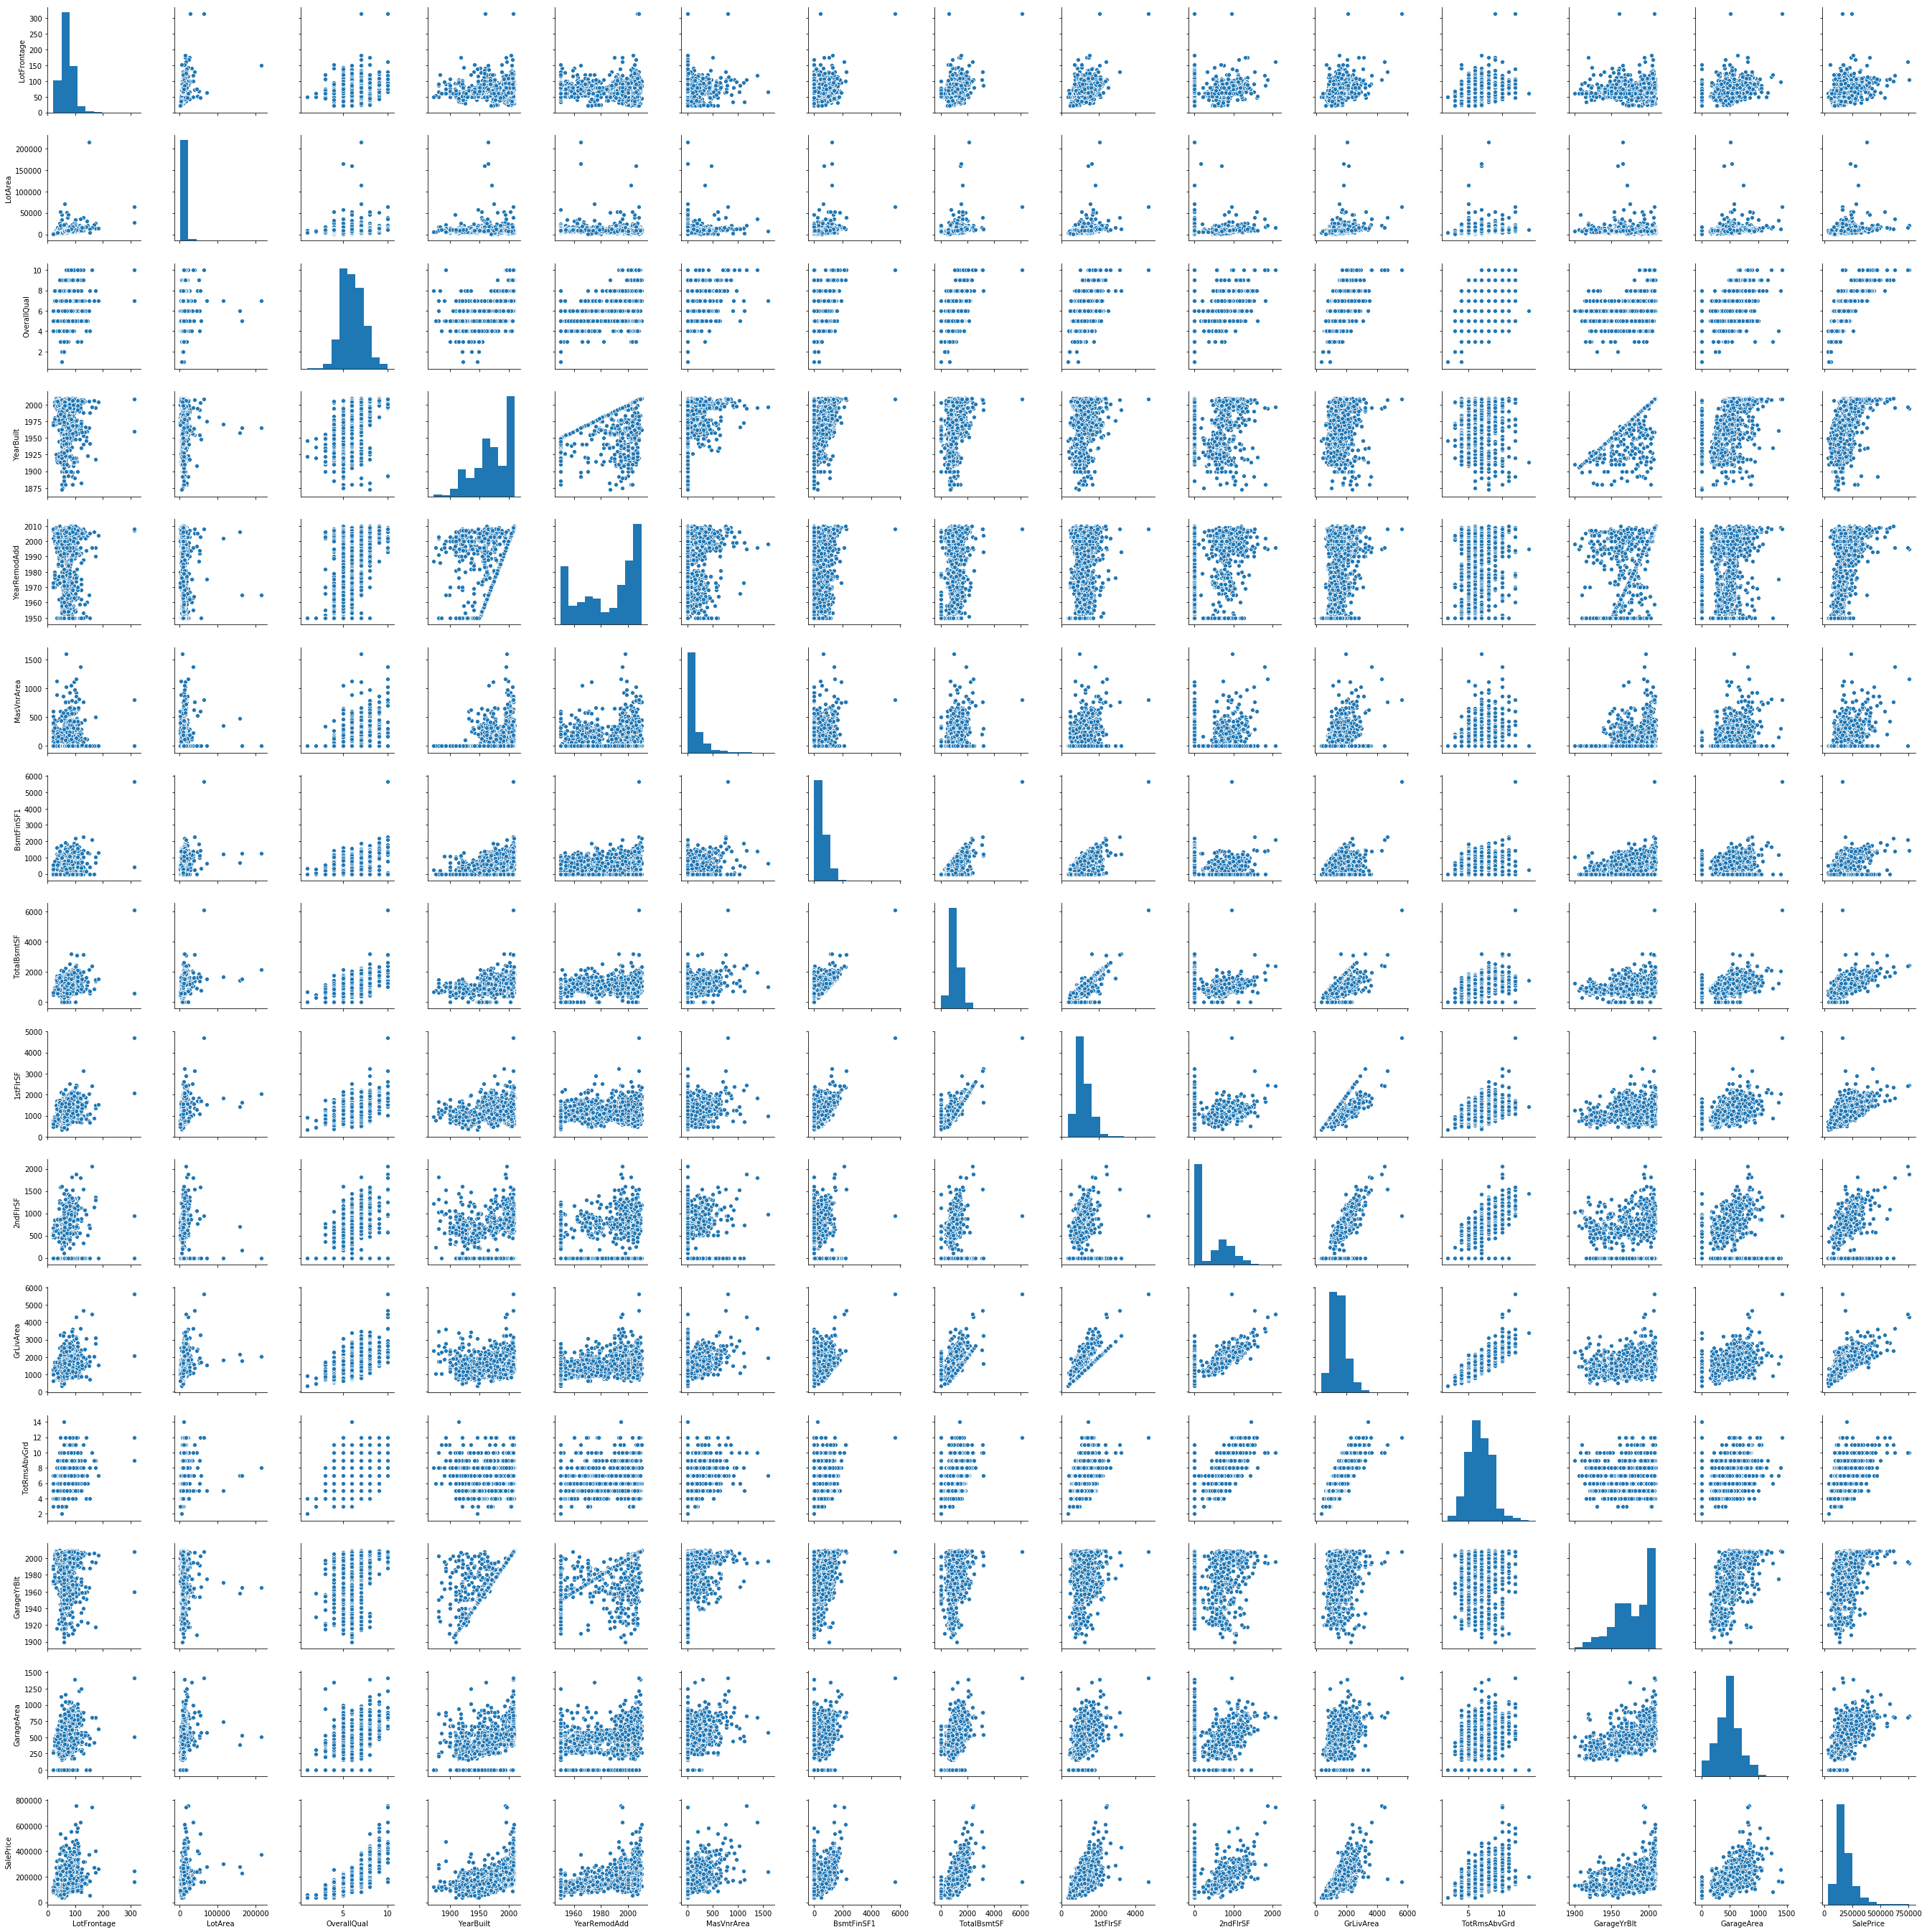

In [11]:
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

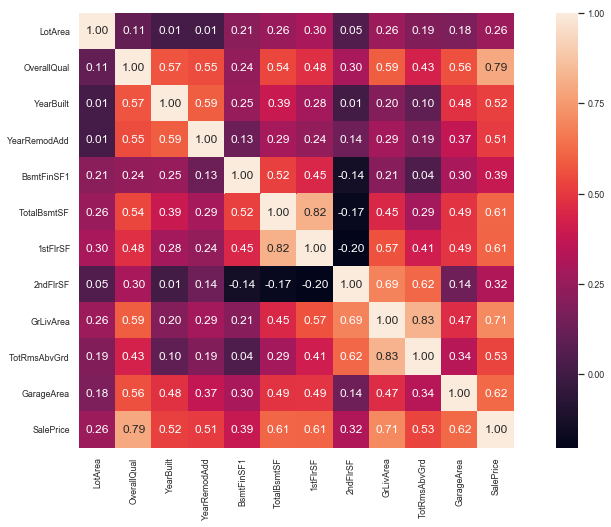

In [117]:
fig = plt.figure(figsize=(15,8))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols, xticklabels=cols)
plt.show()

In [70]:
X = df[['OverallQual']].values
y = df['SalePrice'].values

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 46555.524
Intercept: -102585.917


In [73]:
slr.score(X_test, y_test)

0.6357122732477785

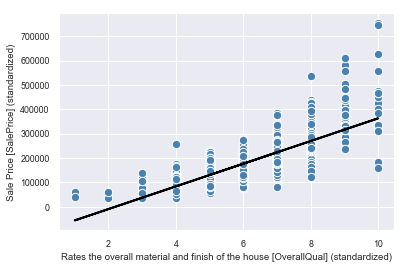

In [74]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, slr.predict(X), color='black', lw=2)
plt.xlabel('Rates the overall material and finish of the house [OverallQual] (standardized)')
plt.ylabel('Sale Price [SalePrice] (standardized)')
plt.show()

In [106]:
X = df[cols].values
y = df['SalePrice'].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [108]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
     mean_squared_error(y_train, y_train_pred),
     mean_squared_error(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000


In [111]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
       (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 1.000, test: 1.000


In [112]:
slr.score(X_test, y_test)

1.0